In [116]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib widget
%matplotlib inline

### arange

**Create a series of (x,y) points. 
Start with creating an array of “x” values = 100 numbers from 0 to 99: Import numpy, and use the “arange” function to define the range of numbers.
Now create y values, using some function y(x).
Start with implementing the identity function y(x) = x. (hint – this function just needs to “copy” the x values)**

In [117]:
x_values = np.arange(0,99,1)

In [118]:
x_values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98])

**Plot the points (x,y) you created in a scatter plot. Use the functions “rcParams” and “scatter”.**

In [119]:
def Y_function (x):
    return x

In [120]:
y_values = x_values
for i in range(99): 
    y_values[i] = Y_function(x_values[i])

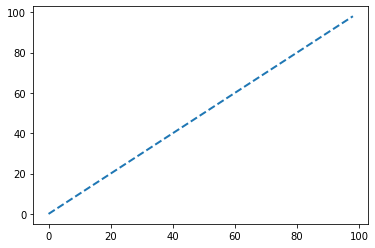

In [121]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
plt.plot(x_values, y_values)

**Add some noise (error) to your identity function: Create a  random noise which has a normal distribution, with mean of 0 and a standard deviation of 5. Use the “random.normal” function. And add the noise to your “y” values.
To observe the effect of noise, it’s useful to see it together with the original “ideal” function of identity. 
Plot both the new, “noisy y” series and the old one in the same graph. 
To distinguish between the two, use different symbols for the new “noisy y” series, with the function “plot” and then “show”.**


In [122]:
y_values_noise = np.zeros(99)
for i in range(99): 
    y_values_noise[i] = y_values[i]
    

noise = np.random.normal(0, 5, 99)
for i in range(99): 
    y_values_noise[i] += noise[i]

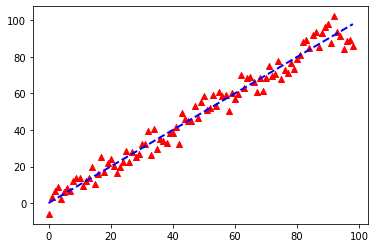

In [123]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_values, y_values, color='blue')
ax.scatter(x_values,y_values_noise,color='red',marker='^')
plt.show()

**Again, the best start is our visual observation:  Before calculating the distance observe the distances of each new point to its original ideal point on the graph: To make it easier to observe, add lines that represent the distance of each noisy point from its ideal point to the graph you plotted. You can explore and use the function “zip”.**

In [124]:
ziped = zip(x_values, y_values_noise)

#use the tuple() function to display a readable version of the result:

print(tuple(ziped))

((0, -5.965863923116014), (1, 3.2958021621869844), (2, 6.779162716403144), (3, 8.758653136377694), (4, 2.426326748742037), (5, 6.032548398830279), (6, 8.051173502648219), (7, 6.772272196405404), (8, 12.31042324601636), (9, 13.766777950761735), (10, 13.709141484091706), (11, 9.311539153955405), (12, 12.28047397969404), (13, 13.747213404973401), (14, 19.66265379271121), (15, 10.50704876558485), (16, 16.133307822499184), (17, 25.336236047008548), (18, 17.15824610129571), (19, 22.04768347908997), (20, 24.036946227411303), (21, 20.258487953912752), (22, 16.530540401212065), (23, 19.471976163663896), (24, 22.324271204928422), (25, 28.747713537609638), (26, 22.208358386876125), (27, 28.09869015355937), (28, 25.303532780347076), (29, 26.582245191987038), (30, 32.35343148426015), (31, 32.532998049903476), (32, 39.637421864089376), (33, 26.095173065245117), (34, 40.55677589274927), (35, 29.378279325941325), (36, 35.13061116428553), (37, 34.058425065510654), (38, 32.85534795932479), (39, 38.25561

## MSE

1.	MSE - Mean Squared Error = Take the distance and raise it to the power of 2 to get dist^2. 

2.	MAE - Mean Absolute Error = Take the absolute value of the distance to get |dist|.


In [125]:
def MSE (tuple_ziped):
    length = len(tuple_ziped)
    MSE = 0
    for i in range (length):
        MSE += ((tuple_ziped[i][0]-tuple_ziped[i][1])**2 / length)

    return MSE

In [126]:
ziped1 = zip(x_values, y_values_noise)
MSE (tuple(ziped1))

23.057211657699423

## calc MSE function

In [127]:
def Calc_MSE (y_original, y_hat):
    length = len(y_original)
    MSE = 0
    for i in range (length):
        MSE += ((y_original[i]-y_hat[i])**2)/length
    return MSE

In [128]:
Calc_MSE (y_values,y_values_noise)

23.057211657699423

## show graph function

In [129]:
def Show_Graph (x, y_original, y_hat):
    MSE = Calc_MSE(y_original, y_hat)
    MSE_Text = "MSE = {mse:.2f}"
    
    mpl.rcParams['lines.linestyle'] = ''
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, y_original, color='blue', label="y_original", marker = 'o', ms = 2)
    ax.scatter(x,y_hat,color='red',marker='x', label="y_hat",s=8)
    plt.errorbar(x, y_original, (y_hat-y_original), mfc='red', ms=1, mew=0 , lolims=True)# ,xuplims=upperlimits, xlolims=lowerlimits
    ax.set(title=MSE_Text.format(mse = MSE), ylabel='Y-Axis', xlabel='X-Axis')
    ax.legend(loc='best')
    plt.grid()
    #plt.text(-5, 60, MSE_Text.format(mse = MSE), fontsize = 15)
    plt.show()

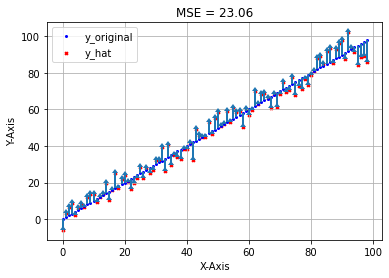

In [130]:
Show_Graph(x_values, y_values, y_values_noise)

## add noise function

In [131]:
def Add_Noise (y_original, noise_center, noise_std):
    
    length = len(y_original)
    y_hat = np.empty(length, dtype=object)
    noise = np.random.normal(noise_center, noise_std, length)
    
    for i in range (length):
        y_hat[i] = y_original[i] + noise[i]
        
    return y_hat

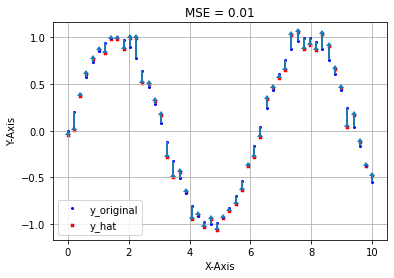

In [132]:
x = np.linspace(0, 10, 50)
y_original = np.sin(x)
y_noise = Add_Noise (y_original, 0, 0.1)
Show_Graph(x, y_original, y_noise)

### Random Seed example

In [133]:
import random
random.seed(0)
print(random.sample(range(1, 100), 3)) 

[50, 98, 54]


## ScyPy interpolate

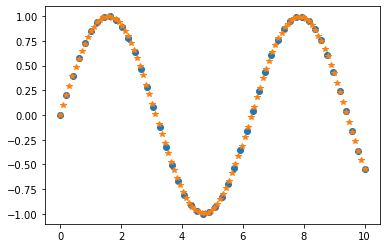

In [134]:
from scipy import interpolate

f = interpolate.interp1d(x, y_original)

xnew = np.linspace(0, 10, 100)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y_original, 'o', xnew, ynew, '*')
plt.show()

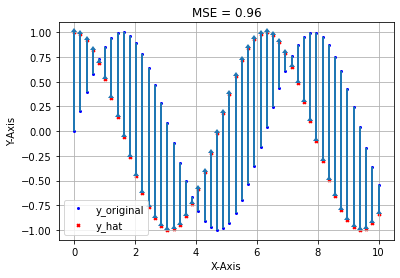

In [135]:
x = np.linspace(0, 10, 50)
y_original = np.sin(x)
y_other = np.cos(x)
y_noise = Add_Noise (y_other, 0, 0.00)
Show_Graph(x, y_original, y_noise)

**Insert different sd for the identity and sin functions and a log function, and observe how does the MSE changes. Produce graphs for each functions with SD values of 5,3,1 and 0**

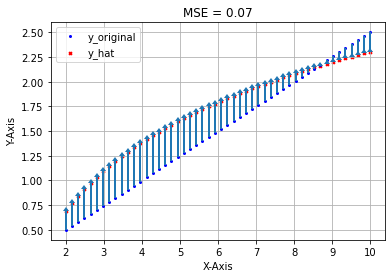

In [136]:
x = np.linspace(2, 10, 50)
y_original = (np.linspace(2, 10, 50))*0.25
y_other = np.log(x)
y_noise = Add_Noise (y_other, 0, 0.00)
Show_Graph(x, y_original, y_noise)

# sympy

In [137]:
from sympy import *

In [138]:
sqrt(3)

sqrt(3)

In [139]:
x, y = symbols('x y')
expr = x + 2*y
expr
x + 2*y

x + 2*y

In [140]:
diff(sin(x)*exp(x), x)

exp(x)*sin(x) + exp(x)*cos(x)

In [141]:
integrate(exp(x)*sin(x) + exp(x)*cos(x), x)

exp(x)*sin(x)

In [142]:
integrate(sin(x**2), (x, -oo, oo))

sqrt(2)*sqrt(pi)/2

In [143]:
Matrix([[1, 2], [2, 2]]).eigenvals()

{3/2 - sqrt(17)/2: 1, 3/2 + sqrt(17)/2: 1}

In [161]:
a = latex(Integral(cos(x)**2, (x, 0, pi)))
a

'\\int\\limits_{0}^{\\pi} \\cos^{2}{\\left(x \\right)}\\, dx'

In [160]:
from IPython.display import display, Math, Latex
display(Math(a))

<IPython.core.display.Math object>

In [145]:
a = cos(x)**2 - sin(x)**2
b = cos(2*x)
a.equals(b)

True

In [146]:
z=0
expr = x**3 + 4*x*y - z
expr.subs([(x, 2), (y, 4), (z, 0)])

40

In [147]:
Matrix([[1, -1], [3, 4], [0, 2]])

Matrix([
[1, -1],
[3,  4],
[0,  2]])

In [148]:
M = Matrix([[1, 2, 3], [3, 2, 1]])
N = Matrix([0, 1, 1])
M*N

Matrix([
[5],
[3]])

In [149]:
sqrt(28)

2*sqrt(7)

In [150]:
x, y = symbols('x y')
f = x + y
f.subs({x:10, y: 20})
f

x + y

In [151]:
x = IndexedBase('x')
t = IndexedBase('t')
i, n = symbols('i n', cls=Idx)
y = Function('y')
f = Sum((-y((x[i]))+t[i])**2, (i, 1, n))/n
f

Sum((-y(x[i]) + t[i])**2, (i, 1, n))/n

In [152]:
dif = diff(f, x[i])
dif

Sum(-2*(-y(x[i]) + t[i])*Derivative(y(x[i]), x[i]), (i, 1, n))/n

In [164]:
srepr(dif)

"Mul(Pow(Idx(Symbol('n', integer=True)), Integer(-1)), Sum(Mul(Integer(-1), Integer(2), Add(Mul(Integer(-1), Function('y')(Indexed(IndexedBase(Symbol('x')), Idx(Symbol('i', integer=True))))), Indexed(IndexedBase(Symbol('t')), Idx(Symbol('i', integer=True)))), Derivative(Function('y')(Indexed(IndexedBase(Symbol('x')), Idx(Symbol('i', integer=True)))), Tuple(Indexed(IndexedBase(Symbol('x')), Idx(Symbol('i', integer=True))), Integer(1)))), Tuple(Idx(Symbol('i', integer=True)), Integer(1), Idx(Symbol('n', integer=True)))))"

In [154]:
from graphviz import Source

src = Source(dotprint(f))

src.render('outputf.gv', view=True)

'outputf.gv.pdf'

In [155]:
from graphviz import Source

a, b, c, x= symbols('a b c x')
expr = a * b * cos( c * x ) + b

src = Source(dotprint(expr))

src.render('output.gv', view=True)

'output.gv.pdf'